In [4]:
import numpy as np
import pickle

In [5]:
def save_model(file_name, model):
    pkl_filename = file_name  
    with open(file_name, 'wb') as file:  
        pickle.dump(model, file)
        
def get_model(file_name):
    with open(file_name, 'rb') as file:
        temp_model = pickle.load(file)
        return temp_model

In [69]:
model = get_model("unsupervised_7_emotions.pkl")

In [70]:
def get_encodings(file_name):
    X = []
    y = []
    with open(file_name) as f:
        newlines = f.readlines()
        for x in newlines:
            if x == "\n":
                continue

            real_thing = x.split("]")
            hehe = real_thing[0].split(" ")
            emotion = hehe[len(hehe) - 1]
            arr = (real_thing[0].replace(emotion, "") + "]").replace("[", "").replace("]", "")
            new_arr = np.array(arr.split(","))

            final_arr = []
            for temp_str in new_arr:
                if (temp_str != " "):
                    final_arr.append(float(temp_str.replace(",", "")))

            X.append(final_arr)
            y.append(emotion)
    return X, y


In [71]:
X, y = get_encodings("layers300ish.txt")

In [72]:
print(len(set(y)))

7


# TSNE Visualization

In [94]:
def plot_emotions(emedded_mat, labels, title, save_plot=False, plot_gmm=True, gmm=None):
    x = emedded_mat[:, 0]
    y = emedded_mat[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    N = len(x)
    hehe = []
    for i in range(N):
        if labels[i] == "joy":
            hehe.append("g")
        elif labels[i] == "shame":
            hehe.append("m")
        elif labels[i] == "disgust":
            hehe.append("b")
        elif labels[i] == "anger":
            hehe.append("r")
        elif labels[i] == "guilt":
            hehe.append("c")
        elif labels[i] == "fear":
            hehe.append("k")
        else: 
            hehe.append("b")
        
    hehe = np.array(hehe)
    
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         alpha=0.3,
                         zorder=10)
    
    if plot_gmm:
        make_ellipses(gmm, ax)
        
    ax.grid(color='white', linestyle='solid', zorder=0)

    ax.set_title(title, size=15)
    
    if save_plot:
        plt.savefig("final_images/" + str(title) +".ps", dpi=1500)
    
    plt.show()

In [74]:
print(len(set(y)))

7


In [80]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import umap

In [62]:
# TSNE STUFF
p = 100
ee = 50
lr = 20

model_tsne_2 = TSNE(n_components=2)
embeddings_tsne_784_2 = model_tsne_2.fit_transform(X)
print(model_tsne_2.kl_divergence_)

0.8283591270446777


In [59]:
predictions = model.predict(X)

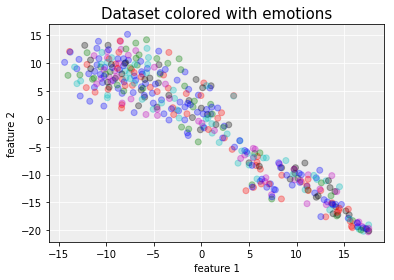

In [76]:
plot_emotions(embeddings_tsne_784_2, y, "Dataset colored with emotions")

# GMM overlay

In [92]:
def make_ellipses(gmm, ax):
    colors = ['black', 'black', 'black']

    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

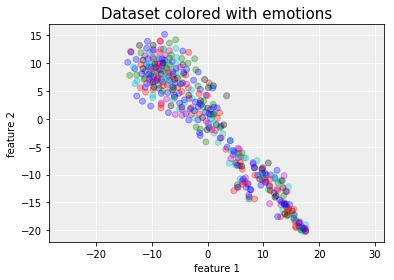

In [96]:
plot_emotions(embeddings_tsne_784_2, y, "Dataset colored with emotions", gmm=model)

# Plotting each cluster in 2d space, labeling w/ mixture comp from GMM

In [125]:
X_anger = [x for i, x in enumerate(embeddings_tsne_784_2) if y[i] == "anger"]
X_joy = [x for i, x in enumerate(embeddings_tsne_784_2) if y[i] == "joy"]
X_disgust = [x for i, x in enumerate(embeddings_tsne_784_2) if y[i] == "disgust"]
X_fear = [x for i, x in enumerate(embeddings_tsne_784_2) if y[i] == "fear"]

X_anger = np.array(X_anger)
X_joy = np.array(X_joy)
X_disgust = np.array(X_disgust)
X_fear = np.array(X_fear)

In [121]:
# true_x should be high d GMM
# x_emotion should be dimension reduces original data
predictions = model.predict(X)

def plot_emotion_wrt_gmm(x_emotion, title, predictions, gmm):
    x = x_emotion[:, 0]
    y = x_emotion[:, 1]
    fig, ax = plt.subplots(subplot_kw=dict(facecolor='#EEEEEE'))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    N = len(x)
    hehe = []
    for i in range(N):
        if predictions[i] == 0:
            hehe.append("g")
        elif predictions[i] == 1:
            hehe.append("m")
        elif predictions[i] == 2:
            hehe.append("b")
        elif predictions[i] == 3:
            hehe.append("r")
        elif predictions[i] == 4:
            hehe.append("c")
        elif predictions[i] == 5:
            hehe.append("k")
        else: 
            hehe.append("b")
        
    hehe = np.array(hehe)
    
    scatter = ax.scatter(x,
                         y,
                         c=hehe,
                         alpha=0.3,
                         zorder=10)
    
        
    ax.grid(color='white', linestyle='solid', zorder=0)

    ax.set_title(title, size=15)
    
    plt.show()

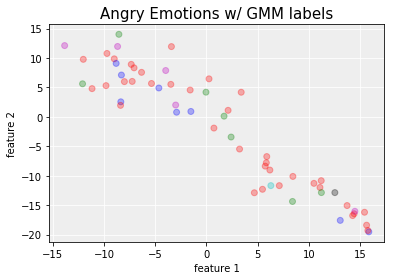

In [122]:
plot_emotion_wrt_gmm(X_anger, "Angry Emotions w/ GMM labels", predictions, model)

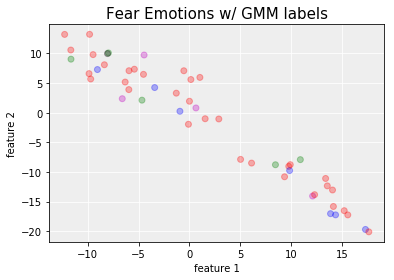

In [128]:
plot_emotion_wrt_gmm(X_fear, "Fear Emotions w/ GMM labels", predictions, model)

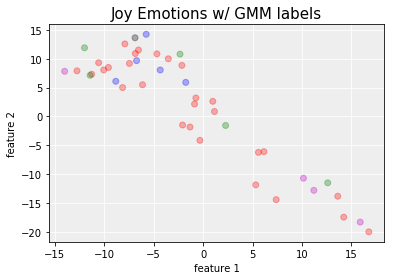

In [132]:
plot_emotion_wrt_gmm(X_joy, "Joy Emotions w/ GMM labels", predictions, model)

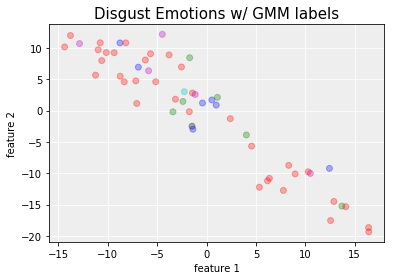

In [131]:
plot_emotion_wrt_gmm(X_disgust, "Disgust Emotions w/ GMM labels", predictions, model)